In [ ]:
# 라이브러리 설치 

import pandas as pd # pandas
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns # seaborn

In [ ]:
# 데이터 불러오기

data = pd.read_csv('RT_RESTAURANT_SALE_INFO.csv')

In [ ]:
# 사용할 컬럼만 불러오기

rest_df = data[['RSTRNT_ID','MENU_LOCAL_NM','SALE_AM','USE_DT','USE_TM']]
rest_df.head()

,RSTRNT_ID,MENU_LOCAL_NM,SALE_AM,USE_DT,USE_TM
0,100887,모듬철판구이 2인,50000,2016-08-26,21:00:00
1,65633,버섯샤브샤브(평일디너),29800,2016-08-26,20:00:00
2,92144,모듬,39000,2016-08-27,12:00:00
3,45775,유자에빠진오동통수육(소),24000,2016-08-26,12:00:00
4,65835,팔색600g한상,34000,0000-00-00,00:00:00


### Q1. 외국인들이 많이 방문한 식당은 어디일까?(방문빈도 TOP10 식당)

In [ ]:
# 식당별 방문빈도

rest_df['RSTRNT_ID'].value_counts()

49945     5245
100919    3521
101148    2909
362       2558
89560     2090
          ... 
1669         1
22833        1
781          1
100988       1
5505         1
Name: RSTRNT_ID, Length: 281, dtype: int64

In [ ]:
# 방문빈도 1-10위 식당에 해당하는 인덱스 값 추출

rest_df['RSTRNT_ID'].value_counts().index[:10]

Int64Index([49945, 100919, 101148, 362, 89560, 7485, 1679, 100962, 101908,
            102715],
           dtype='int64')

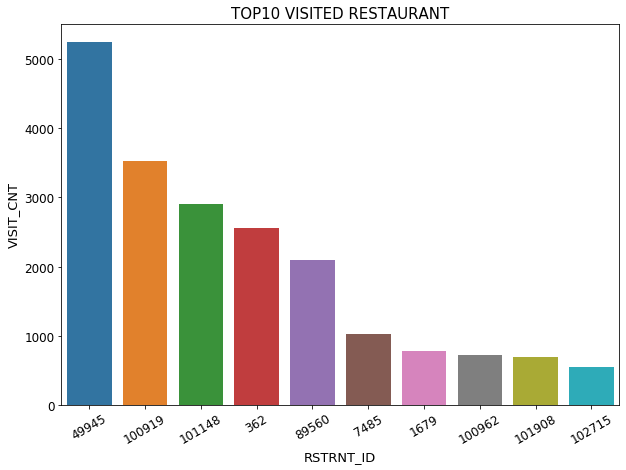

In [ ]:
plt.figure(figsize = (10, 7)) # 캔버스설정
plt.title('TOP10 VISITED RESTAURANT', fontsize = 15) # 타이틀
sns.countplot(x = 'RSTRNT_ID', data = rest_df, order = rest_df['RSTRNT_ID'].value_counts().index[:10] ) # 상위10개

plt.xlabel("RSTRNT_ID", fontsize = 13) # x축 레이블
plt.ylabel("VISIT_CNT", fontsize = 13) # y축 레이블

plt.xticks(rotation = 30, fontsize = 12) # x축 레이블 값 회전
plt.yticks(fontsize = 12)
plt.show()

### Q2. 방문빈도 TOP10 식당에서 많이 판매되고 있는 메뉴는 무엇일까?(메뉴 주문횟수 TOP3)

In [ ]:
# 방문빈도 TOP10 식당 아이디

top_10_rest_list = rest_df['RSTRNT_ID'].value_counts().index[:10]
top_10_rest_list

Int64Index([49945, 100919, 101148, 362, 89560, 7485, 1679, 100962, 101908,
            102715],
           dtype='int64')

In [ ]:
# 방문빈도 TOP10 식당 아이디 인덱스 리스트

top_10_rest_index = list(top_10_rest_list)

In [ ]:
# 방문빈도 TOP10 식당에 해당하는 데이터 프레임만 추출

top_10_rest_df = rest_df[rest_df['RSTRNT_ID'].isin(top_10_rest_index)]
top_10_rest_df

,RSTRNT_ID,MENU_LOCAL_NM,SALE_AM,USE_DT,USE_TM
17,100919,만족 오향 족발 (중)x1,32000,2016-11-17,00:00:00
18,1679,돼지3총사x1,29000,2016-11-19,00:00:00
49,100962,"모둠한판 600gx1, 생삼겹살x1, 어무이 찌개x1, 버섯 모둠x1, 소주x1, ...",67000,2016-12-29,19:00:00
50,100962,"생삼겹살 x3, 도시락 김치 볶음밥 x3",48000,0000-00-00,00:00:00
99,362,냉채4인세트x1,59000,2017-01-19,00:00:00
...,...,...,...,...,...
31000,89560,애슐리D(달빛크루즈+애슐리뷔페디너17:00~21:00)x1,44900,2021-04-30,13:01:00
31001,362,TQRx1,53000,0000-00-00,00:00:00
31002,362,TQRx1,0,0000-00-00,00:00:00
31060,100962,날치알계란찜x1모듬 버섯x1물냉면x1,12000,0000-00-00,00:00:00


In [ ]:
# 방문빈도 TOP10 식당별 메뉴별 주문 횟수

popular_menu = top_10_rest_df.groupby(['RSTRNT_ID'])['MENU_LOCAL_NM'].value_counts().reset_index(name = 'MENU_CNT')
popular_menu

,RSTRNT_ID,MENU_LOCAL_NM,MENU_CNT
0,362,만족오향족발(중)x1,808
1,362,C세트(M)x1,284
2,362,반반족발(중)x1,162
3,362,C세트(L)x1,147
4,362,반반족발 (중)x1,132
...,...,...,...
304,101908,무한삼겹+된장찌개(2인이상)x10,3
305,101908,무한삼겹+된장찌개(2인이상)x13,2
306,101908,무한삼겹+된장찌개(2인이상)x15,1
307,101908,무한삼겹+된장찌개(2인이상)x32,1


In [ ]:
# 식당별, 메뉴 주문 빈도 추출 

popular_menu.sort_values(by=['RSTRNT_ID', 'MENU_CNT'], ascending = False)

,RSTRNT_ID,MENU_LOCAL_NM,MENU_CNT
308,102715,TQRx1,540
296,101908,무한삼겹+된장찌개(2인이상)x2,350
297,101908,무한삼겹+된장찌개(2인이상)x4,124
298,101908,무한삼겹+된장찌개(2인이상)x3,122
299,101908,무한삼겹+된장찌개(2인이상)x6,30
...,...,...,...
52,362,외국인 2인세트x2,1
53,362,"족발 보쌈 세트 (중)x1, 반반족발 (대)x1",1
54,362,족발 보쌈 세트 (중)x2,1
55,362,족발보쌈세트(대)x3,1


In [ ]:
popular_menu.sort_values(by=['RSTRNT_ID', 'MENU_CNT'], ascending = False).groupby('RSTRNT_ID').head(3)

,RSTRNT_ID,MENU_LOCAL_NM,MENU_CNT
308,102715,TQRx1,540
296,101908,무한삼겹+된장찌개(2인이상)x2,350
297,101908,무한삼겹+된장찌개(2인이상)x4,124
298,101908,무한삼겹+된장찌개(2인이상)x3,122
285,101148,마늘족발(중)x1,1829
286,101148,오리지널 족발(중)x1,514
287,101148,반반족발x1,271
270,100962,모둠한판x1,502
271,100962,특별한판x1,144
272,100962,생삼겹살 (180g)x2,31


In [ ]:
# 방문빈도 TOP10 식당별 TOP3 인기메뉴

popular_menu_result = popular_menu.sort_values(by=['RSTRNT_ID', 'MENU_CNT'], ascending = False).groupby('RSTRNT_ID').head(3)
popular_menu_result = popular_menu_result.reset_index(drop = True)
popular_menu_result

,RSTRNT_ID,MENU_LOCAL_NM,MENU_CNT
0,102715,TQRx1,540
1,101908,무한삼겹+된장찌개(2인이상)x2,350
2,101908,무한삼겹+된장찌개(2인이상)x4,124
3,101908,무한삼겹+된장찌개(2인이상)x3,122
4,101148,마늘족발(중)x1,1829
5,101148,오리지널 족발(중)x1,514
6,101148,반반족발x1,271
7,100962,모둠한판x1,502
8,100962,특별한판x1,144
9,100962,생삼겹살 (180g)x2,31


### Q3. 방문빈도 TOP10 식당별로 어느 시간대에 사람들이 많이 방문할까?

In [ ]:
# '시' 단위만 추출

top_10_rest_df['HOUR'] = top_10_rest_df['USE_TM'].str.split(':').str[0]
print(top_10_rest_df['HOUR'])
top_10_rest_df[['USE_TM','HOUR']]

17       00
18       00
49       19
50       00
99       00
         ..
31000    13
31001    00
31002    00
31060    00
31089    12
Name: HOUR, Length: 20073, dtype: object


C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,USE_TM,HOUR
17,00:00:00,00
18,00:00:00,00
49,19:00:00,19
50,00:00:00,00
99,00:00:00,00
...,...,...
31000,13:01:00,13
31001,00:00:00,00
31002,00:00:00,00
31060,00:00:00,00


In [ ]:
# 결과 데이터프레임

top_10_rest_df

,RSTRNT_ID,MENU_LOCAL_NM,SALE_AM,USE_DT,USE_TM,HOUR
17,100919,만족 오향 족발 (중)x1,32000,2016-11-17,00:00:00,00
18,1679,돼지3총사x1,29000,2016-11-19,00:00:00,00
49,100962,"모둠한판 600gx1, 생삼겹살x1, 어무이 찌개x1, 버섯 모둠x1, 소주x1, ...",67000,2016-12-29,19:00:00,19
50,100962,"생삼겹살 x3, 도시락 김치 볶음밥 x3",48000,0000-00-00,00:00:00,00
99,362,냉채4인세트x1,59000,2017-01-19,00:00:00,00
...,...,...,...,...,...,...
31000,89560,애슐리D(달빛크루즈+애슐리뷔페디너17:00~21:00)x1,44900,2021-04-30,13:01:00,13
31001,362,TQRx1,53000,0000-00-00,00:00:00,00
31002,362,TQRx1,0,0000-00-00,00:00:00,00
31060,100962,날치알계란찜x1모듬 버섯x1물냉면x1,12000,0000-00-00,00:00:00,00


In [ ]:
# 식당별 시간대별 방문 빈도

top_10_rest_df.groupby(['RSTRNT_ID','HOUR']).agg({'HOUR' : 'count'})

HOUR
RSTRNT_ID HOUR      
362       00     593
          11      51
          12     376
          13     249
          14      93
...              ...
102715    19      34
          20      39
          21      37
          22      32
          23      11

[136 rows x 1 columns]

In [ ]:
# 방문빈도 TOP10 식당의 시간대별 방문횟수

visit_hour = top_10_rest_df.groupby(['RSTRNT_ID','HOUR']).agg({'HOUR' : 'count'}).rename(columns = {'HOUR' : 'VISIT_CNT'}).reset_index()
visit_hour

,RSTRNT_ID,HOUR,VISIT_CNT
0,362,00,593
1,362,11,51
2,362,12,376
3,362,13,249
4,362,14,93
...,...,...,...
131,102715,19,34
132,102715,20,39
133,102715,21,37
134,102715,22,32


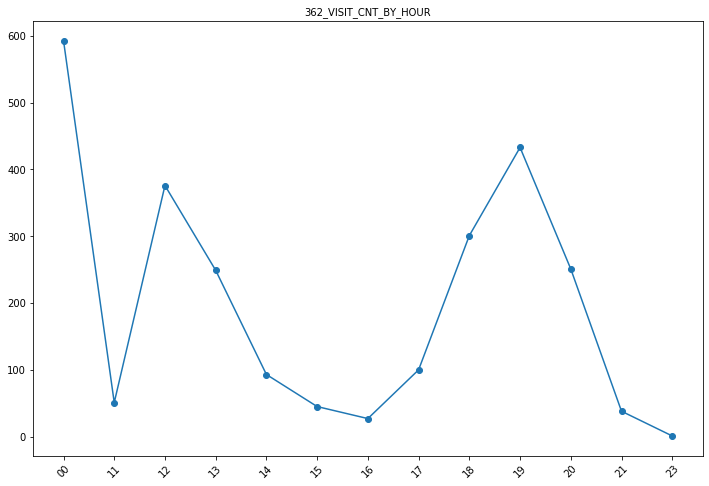

In [ ]:
# 식당아이디 362 시간대별 방문빈도 변화

df_362 = visit_hour[visit_hour['RSTRNT_ID'] == 362]

fig = plt.figure(figsize=(12,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df_362['HOUR'], df_362['VISIT_CNT'], marker='o') ## ax.plot(x축값, y축값, 마커)
 
plt.xticks(rotation = 45) ## x축 눈금 라벨 설정 - 45도 회전 
plt.title('362_VISIT_CNT_BY_HOUR',fontsize=10) ## 타이틀 설정
plt.show()

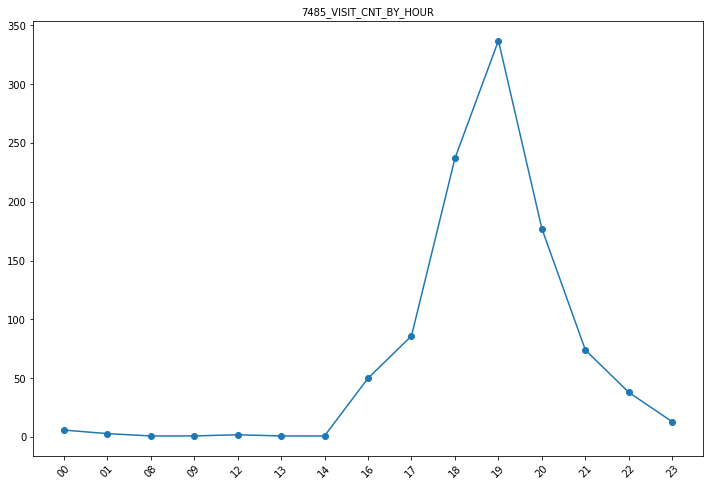

In [ ]:
# 식당아이디 7485 시간대별 방문빈도 변화

df_7485 = visit_hour[visit_hour['RSTRNT_ID'] == 7485]

fig = plt.figure(figsize=(12,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df_7485['HOUR'],df_7485['VISIT_CNT'], marker='o') ## 선그래프 생성
 
plt.xticks(rotation = 45) ## x축 눈금 라벨 설정 - 45도 회전 
plt.title('7485_VISIT_CNT_BY_HOUR',fontsize=10) ## 타이틀 설정
plt.show()

### Q4. 평균 매출액이 가장 높은 식당은 어디일까?

In [ ]:
rest_df.groupby(['RSTRNT_ID']).agg({'RSTRNT_ID' : 'count', 'SALE_AM' : ['mean','sum']})

RSTRNT_ID        SALE_AM         
              count           mean      sum
RSTRNT_ID                                  
8                 2   80000.000000   160000
13               15  144000.000000  2160000
21               21   30571.428571   642000
57                8   39500.000000   316000
114              39   16397.435897   639500
...             ...            ...      ...
102793           24    8137.500000   195300
103869            5    8000.000000    40000
103955            3  128000.000000   384000
106988            3   61800.000000   185400
107498           10    5211.300000    52113

[281 rows x 3 columns]

In [ ]:
sales_avg = rest_df.groupby(['RSTRNT_ID']).agg({'RSTRNT_ID' : 'count', 'SALE_AM' : ['mean','sum']}).rename(columns = {'RSTRNT_LOCAL_NM' : 'VISIT_CNT'})
sales_avg

RSTRNT_ID        SALE_AM         
              count           mean      sum
RSTRNT_ID                                  
8                 2   80000.000000   160000
13               15  144000.000000  2160000
21               21   30571.428571   642000
57                8   39500.000000   316000
114              39   16397.435897   639500
...             ...            ...      ...
102793           24    8137.500000   195300
103869            5    8000.000000    40000
103955            3  128000.000000   384000
106988            3   61800.000000   185400
107498           10    5211.300000    52113

[281 rows x 3 columns]

In [ ]:
# 컬럼명 합쳐주기

sales_avg.columns = [''.join(col).strip() for col in sales_avg.columns.values]
sales_avg = sales_avg.reset_index()

In [ ]:
# 컬럼명 바꾸기

sales_avg = sales_avg.rename(columns = {'RSTRNT_IDcount' : 'VISIT_CNT', 'SALE_AMmean' : 'SALE_AM_MEAN', 'SALE_AMsum' : 'SALE_AM_SUM'})
sales_avg

,RSTRNT_ID,VISIT_CNT,SALE_AM_MEAN,SALE_AM_SUM
0,8,2,80000.000000,160000
1,13,15,144000.000000,2160000
2,21,21,30571.428571,642000
3,57,8,39500.000000,316000
4,114,39,16397.435897,639500
...,...,...,...,...
276,102793,24,8137.500000,195300
277,103869,5,8000.000000,40000
278,103955,3,128000.000000,384000
279,106988,3,61800.000000,185400


In [ ]:
sales_avg = sales_avg.sort_values(by = 'SALE_AM_SUM', ascending = False)[:10].reset_index(drop = True)
sales_avg

,RSTRNT_ID,VISIT_CNT,SALE_AM_MEAN,SALE_AM_SUM
0,49945,5245,56457.578646,296120000
1,89560,2090,127106.076555,265651700
2,100919,3521,36179.767112,127388960
3,362,2558,42888.584832,109709000
4,101148,2909,36383.636989,105840000
5,85440,439,215043.280182,94404000
6,101355,522,158551.724138,82764000
7,882,217,304308.755760,66035000
8,85443,494,129566.801619,64006000
9,102670,129,272720.930233,35181000


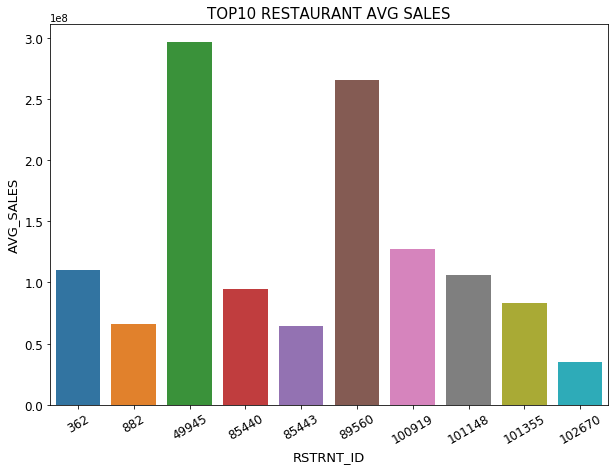

In [ ]:
# 평균 매출액 TOP10 시각화

plt.figure(figsize = (10, 7)) 
plt.title('TOP10 RESTAURANT AVG SALES', fontsize = 15) # 타이틀
sns.barplot(x="RSTRNT_ID", y="SALE_AM_SUM", data=sales_avg)

plt.xlabel("RSTRNT_ID", fontsize = 13) # x축 레이블
plt.ylabel("AVG_SALES", fontsize = 13) # y축 레이블

plt.xticks(rotation = 30, fontsize = 12) # x축 레이블 값 회전
plt.yticks(fontsize = 12)
plt.show()

### Q5. 식당의 월별 매출액은 어떻게 변화하고 있을까?

In [ ]:
# 년, 월 컬럼 만들기

rest_df['YEAR'] = rest_df['USE_DT'].str.split('-').str[0]
rest_df['MONTH'] = rest_df['USE_DT'].str.split('-').str[1]
rest_df

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,RSTRNT_ID,MENU_LOCAL_NM,SALE_AM,USE_DT,USE_TM,YEAR,MONTH
0,100887,모듬철판구이 2인,50000,2016-08-26,21:00:00,2016,08
1,65633,버섯샤브샤브(평일디너),29800,2016-08-26,20:00:00,2016,08
2,92144,모듬,39000,2016-08-27,12:00:00,2016,08
3,45775,유자에빠진오동통수육(소),24000,2016-08-26,12:00:00,2016,08
4,65835,팔색600g한상,34000,0000-00-00,00:00:00,0000,00
...,...,...,...,...,...,...,...
31130,114,돼지국밥x1,7000,0000-00-00,00:00:00,0000,00
31131,4373,흑돼지해물잡채밥x1,10000,0000-00-00,00:00:00,0000,00
31132,15898,대포찜닭(2인)x1,22000,0000-00-00,00:00:00,0000,00
31133,102694,TQRx1,68300,0000-00-00,00:00:00,0000,00


In [ ]:
# YEAR = 0000 삭제하기

drop_idx = rest_df[rest_df['YEAR'] == '0000'].index
drop_idx

rest_df.drop(drop_idx, inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# 평균 매출액 1위를 차지한 49945의 월별 평균 매출액 알아보기

rest_df_49945 = rest_df[rest_df['RSTRNT_ID'] == 49945]
rest_df_49945.head()

,RSTRNT_ID,MENU_LOCAL_NM,SALE_AM,USE_DT,USE_TM,YEAR,MONTH
2366,49945,콤비네이션콤보1x1,39900,2018-05-21,00:00:00,2018,05
2369,49945,스페셜콤보x1,65900,2018-05-22,00:00:00,2018,05
2370,49945,스페셜콤보x1,65900,2018-05-22,00:00:00,2018,05
2371,49945,스페셜콤보x1,65900,2018-05-22,00:00:00,2018,05
2377,49945,콤비네이션콤보2x1,54900,2018-05-23,00:00:00,2018,05


In [ ]:
quartely_avg_sales = rest_df_49945.groupby(['YEAR', 'MONTH']).agg({'RSTRNT_ID' : 'count', 'SALE_AM' : ['mean', 'sum']}).reset_index()
quartely_avg_sales

YEAR MONTH RSTRNT_ID       SALE_AM          
                   count          mean       sum
0   2018    05        35  52928.571429   1852500
1   2018    06       184  55921.195652  10289500
2   2018    07       248  55516.129032  13768000
3   2018    08       298  55679.865772  16592600
4   2018    09       247  54673.279352  13504300
5   2018    10       428  56358.878505  24121600
6   2018    11       234  56410.683761  13200100
7   2018    12       301  56105.647841  16887800
8   2019    01       329  55820.060790  18364800
9   2019    02       359  54110.027855  19425500
10  2019    03       162  57625.925926   9335400
11  2019    04       230  57981.739130  13335800
12  2019    05       238  58042.857143  13814200
13  2019    06       261  55265.517241  14424300
14  2019    07       247  56501.619433  13955900
15  2019    08       267  56620.973783  15117800
16  2019    09       313  57702.875399  18061000
17  2019    10       399  58687.468672  23416300
18  2019    11       192  57059.375000  10955400
19  2019    12        13  51438.461538    668700
20  2020    01       246  56047.560976  13787700
21  2020    02        10  97730.000000    977300
22  2020    04         1  39900.000000     39900

In [ ]:
# 컬럼명 합치기

quartely_avg_sales.columns = [''.join(col).strip() for col in quartely_avg_sales.columns.values]
quartely_avg_sales = quartely_avg_sales.reset_index(drop = True)
quartely_avg_sales

,YEAR,MONTH,RSTRNT_IDcount,SALE_AMmean,SALE_AMsum
0,2018,05,35,52928.571429,1852500
1,2018,06,184,55921.195652,10289500
2,2018,07,248,55516.129032,13768000
3,2018,08,298,55679.865772,16592600
4,2018,09,247,54673.279352,13504300
5,2018,10,428,56358.878505,24121600
6,2018,11,234,56410.683761,13200100
7,2018,12,301,56105.647841,16887800
8,2019,01,329,55820.060790,18364800
9,2019,02,359,54110.027855,19425500


In [ ]:
# 컬럼명 변경

quartely_avg_sales = quartely_avg_sales.rename(columns = {'RSTRNT_IDcount' : 'VISIT_CNT',
                                                          'SALE_AMmean' : 'SALE_AM_MEAN',
                                                          'SALE_AMsum' : 'SALE_AM_SUM'})

quartely_avg_sales.columns

Index(['YEAR', 'MONTH', 'VISIT_CNT', 'SALE_AM_MEAN', 'SALE_AM_SUM'], dtype='object')

In [ ]:
# year_month 컬럼 만들기

quartely_avg_sales["YEAR_MONTH"] = quartely_avg_sales["YEAR"] + "_" + quartely_avg_sales["MONTH"]
quartely_avg_sales.head()

,YEAR,MONTH,VISIT_CNT,SALE_AM_MEAN,SALE_AM_SUM,YEAR_MONTH
0,2018,05,35,52928.571429,1852500,2018_05
1,2018,06,184,55921.195652,10289500,2018_06
2,2018,07,248,55516.129032,13768000,2018_07
3,2018,08,298,55679.865772,16592600,2018_08
4,2018,09,247,54673.279352,13504300,2018_09


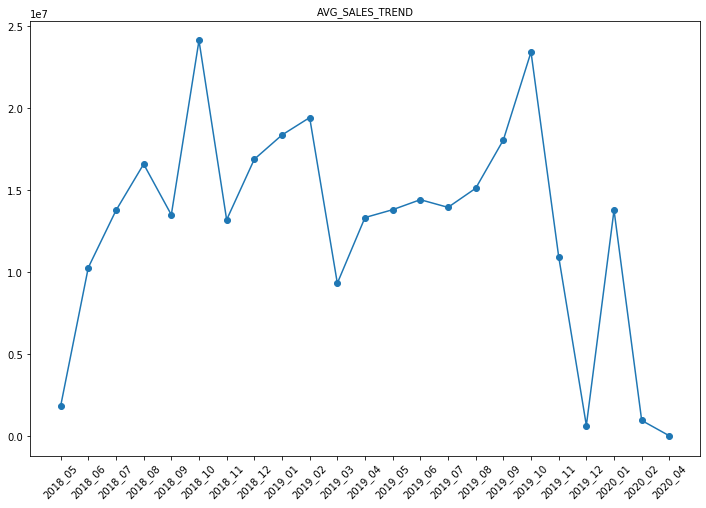

In [ ]:
# 시각화

fig = plt.figure(figsize=(12,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(quartely_avg_sales['YEAR_MONTH'],quartely_avg_sales['SALE_AM_SUM'], marker='o') ## 선그래프 생성
 
plt.xticks(rotation = 45) ## x축 눈금 라벨 설정 - 45도 회전 
plt.title('AVG_SALES_TREND',fontsize=10) ## 타이틀 설정
plt.show()